## Ecuaciones de una variable:

Para los siguiente problemas: 


1.0 ¿Para que ángulo el area del segmento circular es igual a un cuarto del area de la circunferencia?

- Muestre que la expresión que permite resolver el problema:




\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- ¿Construya una grafica para theta?,  Alrededor de que punto esta solución.(Para este punto se recomienda emplear un data frame de pandas )

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.












In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Área de segmento circular:
\begin{equation}
A_\theta = r^2(\frac{\theta}{2} - \sin\frac{\theta}{2}\cos\frac{\theta}{2})
\end{equation}
 
\begin{equation}
A_\theta = r^2(\frac{\theta}{2} - \frac{\sinθ}{2})
\end{equation}

Área de la circunferencia:
\begin{equation}
A_c=\frac{\pi r^2}{4}
\end{equation}
Igualamos:
\begin{equation}
r^2(\frac{\theta}{2} - \frac{\sinθ}{2}) = \frac{\pi r^2}{4}
\end{equation}
Y simplificamos:
\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}

\begin{equation}
\end{equation}

In [5]:
def funcion(t):
    return t-np.sin(t)-(np.pi/2)

In [25]:
t=np.linspace(0,4,1000)
y=np.array(funcion(t))
z=np.zeros(1000)

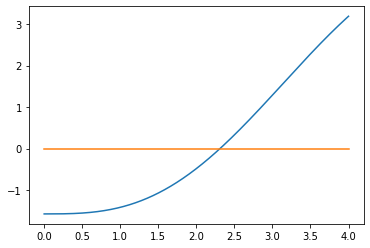

In [27]:
plt.plot(t,y)
plt.plot(t,z);

In [37]:
t=np.linspace(2,2.5,10000)
y=np.array(funcion(t))
z=np.zeros(10000)

In [33]:
d=pd.DataFrame(np.array([t,y]).T,columns=['t','y'])
eps=1e-4

In [34]:
d[abs(y)<eps]

,t,y
6196,2.309831,-8.447783e-05
6197,2.309881,-7.897963e-07
6198,2.309931,8.290008e-05


Vemos que:
\begin{equation}
2.309881 \leq \theta_0 \leq 2.309931
\end{equation}

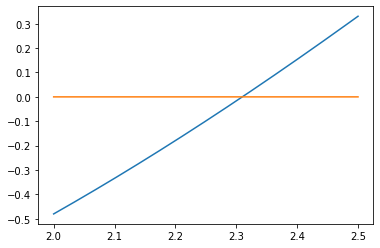

In [38]:
plt.plot(t,y);
plt.plot(t,z);


In [41]:
f=lambda t: t-np.sin(t)-(np.pi/2)

In [18]:
import scipy as sc
from scipy import optimize

In [45]:
#Método de bisección:
sc.optimize.bisect(f,2.3,2.4)

2.3098814600103648

In [44]:
#Método del punto fijo:
ff=lambda x:x-(x-np.sin(x)-(np.pi/2))
sc.optimize.fixed_point(ff,2.3)

array(2.30988146)

In [46]:
#Método de la secante:
sc.optimize.newton(f,2.3)

2.3098814600100575

In [47]:
#Método de Newton-Raphson:
fp= lambda t: 1-np.cos(t)
sc.optimize.newton(f,2.3,fp)

2.309881460010057

2.0 An object falling vertically through the air is subjected to viscous resistance as well as to the force
of gravity. Assume that an object with mass m is dropped from a height s0 and that the height of the
object after t seconds is

\begin{equation}
s(t)=s_0 - \frac{mg}{k}t+\frac{m^2g}{k}t(1-e^{-kt/m})
\end{equation}

where $g = 32.17 ft/s2$ and $k$ represents the coefficient of air resistance in $lbs/ft$. Suppose $s0 = 300 ft$,
$m = 0.25$ lb, and $k = 0.1$ lbs/ft. Find, to within $0.01$ s, the time it takes this quarter-pounder to hit the
ground

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobrar la solución.





In [52]:
g=32.17
k=0.1
m=0.25
s0=300
cl = lambda t,g=32.17,k=0.1,m=0.25,s0=300: s0-((m*g*t)/k)+(((m**2)*g*t)/k)*(1-np.exp(-k*t/m))


In [53]:
t=np.linspace(-10,10,10000)
y=np.array(cl(t))
z=np.zeros(10000)

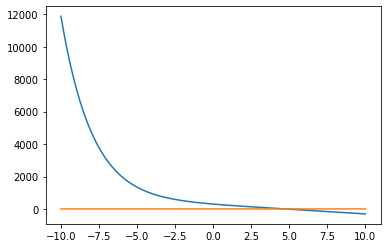

In [54]:
plt.plot(t,y)
plt.plot(t,z);

In [78]:
t=np.linspace(4,6,10000)
y=np.array(cl(t))
z=np.zeros(10000)

In [80]:
d2=pd.DataFrame(np.array([t,y]).T,columns=['t','y'])
eps=1e-2
d2[abs(y)<eps]

,t,y
3680,4.736074,0.003775
3681,4.736274,-0.007748


Vemos que la masa toca el piso entre:
\begin{equation}
4.736074 \leq t \leq 4.736274 
\end{equation}

In [82]:
#Método de bisección:
sc.optimize.bisect(cl,4.6,4.8)

4.736139137604914

In [99]:
#Método del punto fijo:
fcl=lambda t,g=32.17,k=0.1,m=0.25,s0=300:t-(s0-((m*g*t)/k)+(((m**2)*g*t)/k)*(1-np.exp(-k*t/m)))
sc.optimize.fixed_point(fcl,4.5)

array(4.73613914)

In [100]:
#Método de la secante:
sc.optimize.newton(cl,4.7)

4.736139137603491

In [103]:
#Método de Newton-Raphson:
clp= lambda t,g=32.17,k=0.1,m=0.25,s0=300: -(m*g/k)-((m**2)*g/k)-((m**2)*g*np.exp(-k*t/m)/k) + (m*g*t*np.exp(-k*t/m)/k)
sc.optimize.newton(cl,4.7,clp)

4.736139135840935

3.0 En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

d. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

Hallamos una expresión para T en función de m:
\begin{equation}
T(m)=\frac{m}{\tanh^{-1}(m)}
\end{equation}

Entonces podemos resolver el problema como:
\begin{equation}
\frac{1}{2}=\frac{m}{\tanh^{-1}(m)}
\end{equation}
Despejando:
\begin{equation}
\frac{m}{\tanh^{-1}(m)}-\frac{1}{2}=0
\end{equation}

In [169]:
T= lambda m: (m/np.arctanh(m))-0.5
m=np.linspace(0.0001,0.999,10000)
T0=np.array(T(m))
z=np.zeros(10000)

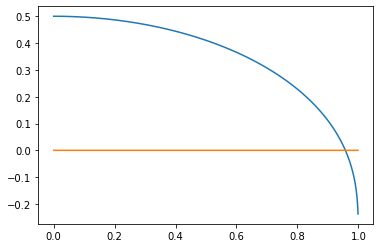

In [170]:
plt.plot(m,T0);
plt.plot(m,z);

In [173]:
round(sc.optimize.newton(T,0.9),4)

0.9575

In [179]:
round(sc.optimize.bisect(T,0.1,0.99),4)

0.9575

In [181]:
Tpf=lambda m: m - ((m/np.arctanh(m))-0.5)
sc.optimize.fixed_point(Tpf,0.94)

array(0.95750402)

Así, la magnetización para \begin{equation}T=0.5\end{equation} es: \begin{equation}m=0.9575\end{equation} 

Entonces para crear la función podemos reemplazar el valor de \begin{equation}T=0.5\end{equation} por \begin{equation}T=t\end{equation} donde t es variable:
\begin{equation}
t=\frac{m}{\tanh^{-1}(m)}
\end{equation}
Despejando:
\begin{equation}
\frac{m}{\tanh^{-1}(m)}-t=0
\end{equation}

In [182]:
t=np.linspace(0.1,0.99,100)
z0=np.zeros(100)
e=0
for i in t:
    T= lambda m: (m/np.arctanh(m))-i
    m=sc.optimize.bisect(T,0.1,1)
    z0[e]=m
    e+=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in arctanh
  """


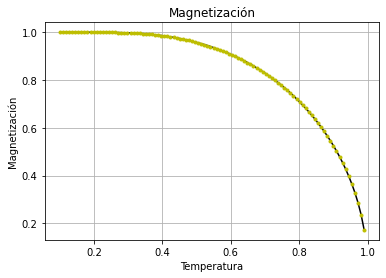

In [190]:
plt.plot(t,z0,'k');
plt.plot(t,z0,'y.')
plt.title("Magnetización");
plt.xlabel("Temperatura")
plt.ylabel("Magnetización")
plt.grid();

5. Construir un fractal empleando el metodo de Newton-Raphson, 
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)} 
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}


Replicar el codigo y entender.



```


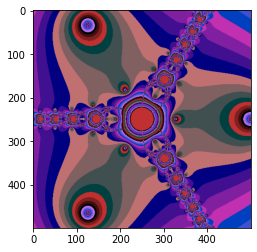

In [201]:

import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 500 #Numero de pixeles en x
Npx_Y = 500 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada 
def f(z): 
  return z**3 - 1

def fp(z): 
  return 3*z**2

h = 1E-4
def fpn(z, h): 
  return (f(z+h)-f(z))/h
  

a = 0.2
Niteraciones = 100
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1 
  y = -1
  for zy_ in zy: 
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones): 
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break 
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )


plt.imshow(image);
#plt.xlim(400, 600)
#plt.ylim(400, 523)

In [186]:
plt.plot?